**Importing the packages of dependencies**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets  # We have directly imported the datasets from the sklearn libariry
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Importing the Boston House Price Dataset**

In [4]:
house_price_dataset = sklearn.datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

**Loading the dataset to the pandas dataframe**

In [6]:
# This will print the dataset without the header of the columns
house_price_dataframe = pd.DataFrame(house_price_dataset.data)
print(house_price_dataframe)

          0     1      2    3      4   ...   8      9     10      11    12
0    0.00632  18.0   2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1    0.02731   0.0   7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2    0.02729   0.0   7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3    0.03237   0.0   2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4    0.06905   0.0   2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33
..       ...   ...    ...  ...    ...  ...  ...    ...   ...     ...   ...
501  0.06263   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  391.99  9.67
502  0.04527   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  9.08
503  0.06076   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  5.64
504  0.10959   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  393.45  6.48
505  0.04741   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  7.88

[506 rows x 13 columns]


In [9]:
# This will print the dataset with the name of the header
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)
print(house_price_dataframe)
house_price_dataframe.head()

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
# Adding the target to the dataframe as Price is missing the dataset
house_price_dataframe['price'] = house_price_dataset.target
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
# Checking the number of rows and columns in the dataframe
house_price_dataframe.shape

(506, 14)

In [20]:
# It is important to check wheather the dataset should not contain any missing values in the dataframe as it may make the model not good
# Checking the missing values in the dataframe
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [21]:
# Statistical Measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Understanding the correlation between various features in the dataframe**

There are two types of correlation:

1. Positive Correlation

2. Negative Correlation

In [22]:
correlation = house_price_dataframe.corr()

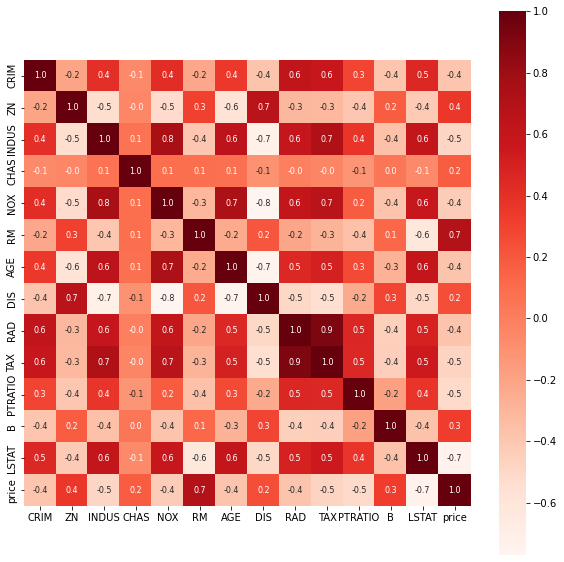

In [25]:
# Constructing a Heatmap to understand the correlation
plt.figure(figsize=(10,10))
# sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

**Splitting the Data and Target**

In [26]:
X = house_price_dataframe.drop(['price'], axis=1) #axis is set to 1 to apply for the whole column, if axis=0 then only rows will be dropped
Y = house_price_dataframe['price']

In [27]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

**Splitting the data into Training Data and Test Data**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1) #here I am selected random state as 1


In [29]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


**Model Training : XGBoost Regressor**

In [30]:
# Loading the model
model = XGBRegressor()

In [31]:
# Training the model with X_train
model.fit(X_train, Y_train)

[04:00:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

**Evaluation**

**Prediction on Training Data**

In [32]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [33]:
print(training_data_prediction)

[25.048151  22.662462   8.458681  20.905691  14.563758  25.679934
 27.51617   25.37881   45.644592  24.045649  10.660132  34.127537
 35.430862  36.522556  19.133648  18.85809   33.91484   47.677933
 20.870264  12.973117  29.153881  19.872124  24.924599  20.954975
 23.946466  19.023764  21.054193  26.7249    20.423717  22.496307
 25.230143   9.525525  24.883894  35.10766   13.956592  14.212715
 41.281284  11.095758  20.670912  15.821131  18.054611  23.936049
 29.978254  22.352541  23.109278  15.936208  27.03913   19.348799
 35.163136  14.839837  20.046473  17.663183  13.28538   29.442507
 24.924572  24.269297  22.715654  25.922625  43.211594  22.728882
 26.43058   15.387772  19.288763  21.005173  23.366146  11.016834
 15.550854  23.922337  20.622755  20.264856  15.010928  29.927689
 19.244297  23.75609   29.657944  20.367489  48.066456  21.156334
 19.50832   22.898682  17.519705  30.349104  11.508479  20.874737
 20.64511   38.51378   20.53336   21.551672  19.98694   14.073284
 20.957743

**Accuracy Score is used for classifier model,i.e, for boolean values**

**While for Regression model for continuous data, we use R Squared Error and Mean Absolute Error**

In [34]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction) 

print("R Squared Error is: ", score_1)
print("Mean Absolute Error is: ", score_2)


R Squared Error is:  0.9748911529344064
Mean Absolute Error is:  1.095920478235377


**Visualizing the actual price and predicted prices**

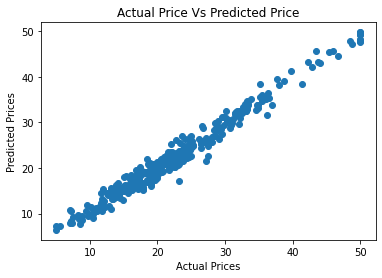

In [35]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price Vs Predicted Price")
plt.show()

**Prediction on Test Data**

In [36]:
# Accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [38]:
# R Squared Error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

#Mean Absolute Error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("The R Squared Mean of the Test Data is: ", score_3)
print("The Mean Absolute Errror of the Test Data is: ",score_4)

The R Squared Mean of the Test Data is:  0.9196210387570751
The Mean Absolute Errror of the Test Data is:  2.2178991551492726
